# Data Science - Getting Started with Python

Following are exercises you should complete. Workflow:

1. Complete the exercises! This means fill out the code cells, and run them (shift-enter or click the play button that appears when you're in one of them)
2. Take a look at your work, and write comments/add text cells as appropriate to explain
3. Upload the notebook to your GitHub repository and submit a link [here](https://docs.google.com/forms/d/e/1FAIpQLScdlw-GN3tHPHxROIulxoPmxXmvK-UmXco3lgjiJ0Ckltn6QA/viewform?usp=sf_link)

## Exercise 1 - A bit of Math

For these "word" problems, use Python to clearly solve them. Your code will "show your work" - use good variable names! To show your answers you should write a `print()` statement at the end.

### a) It's a gas

A taxi driver is calculating their profit over two weeks by adding up the fares they charge and subtracting the cost of gas. The price of gas changes over time - it was `$3.52`/gallon the first week and `$3.57`/gallon this second week. Their car gets 20 miles per gallon.

For the first week the driver had a total of 23 passengers with average `$29` fare each, and drove a total of 160 miles. For the second week they had 17 passengers with average `$30` fare each, and drove a total of 220 miles. Assume that for both weeks they purchase all the gas needed during that week (i.e. they refuel every week to maintain a constant level of gas in the tank).

Based on the above, answer the following questions:

- What is their total profit over both weeks?
- During which week was their average (mean) profit per passenger higher?


In [35]:
# your code here
from math import *

# calculates the profit
def profitcalc(passenger, fare, distance, gasprice):
    return (fare*passenger)-((distance/20)*gasprice)

# calculates the mean profit per passenger
def aveprofit(passenger, profit):
    return profit/passenger

# returns which week has a higher mean profit per passenger
def compare_profit(aprofit1, aprofit2):
    if aprofit1 > aprofit2:
        print ('Week 1 has a higher mean profit per passenger.')
    else:
        print ('Week 2 has a higher mean profit per passenger.')

profit_wk1 = profitcalc(23,29,160,3.52)
print('Profit for week 1: %f' % profit_wk1)
profit_wk2 = profitcalc(17,30,160,3.57)
print('Profit for week 2: %f' %profit_wk2)
print('Total profit: %f' % (profit_wk1 + profit_wk2))
aprofit_wk1 = aveprofit(profit_wk1, 23)
aprofit_wk2 = aveprofit(profit_wk2, 17)
print('Average profit per passenger week 1: %f' % aprofit_wk1)
print('Average profit per passenger week 2: %f' % aprofit_wk2)
compare_profit(aprofit_wk1, aprofit_wk2)

Profit for week 1: 638.840000
Profit for week 2: 481.440000
Total profit: 1120.280000
Average profit per passenger week 1: 0.036003
Average profit per passenger week 2: 0.035311
Week 1 has a higher mean profit per passenger.


### b) Mo' money...

A cash drawer contains 160 bills, all 10s and 50s. The total value of the 10s and 50s is $1,760.

How many of each type of bill are in the drawer? You can figure this out by trial and error (or by doing algebra with pencil and paper), but try to use loops and conditionals to check a plausible possibilities and stop when you find the correct one.

In [19]:
# solved using algebra: (let x be no. of 10s bill, y be no. of 50s bill) x + y = 160; 10x + 50y = 1760 / y=4, x=156
# assumption: type of bill is constant, only 2 types of bills

def total_per_bill(bills, amount):
    x = 0
    y = 0
    # should satisfy this condition: x + y = bills; 10x + 50y = amount
    # (10 * bills) - (10 * y) + 50 * y == 1760
    while (10 * bills) - (10 * y) + 50 * y != 1760:
        y = y + 1
    x = 160 - y
    return x, y

print(total_per_bill(160, 1760))

(156, 4)


## Exercise 2 - Drawing a plot

Use NumPy and Matplotlib to draw a scatterplot of uniform random `(x, y)` values all drawn from the `[0, 1]` interval. Helpful documentation:

*   https://matplotlib.org/tutorials/index.html
*   https://docs.scipy.org/doc/numpy/user/quickstart.html

Stretch goal - draw more plots! You can refer to the [Matplotlib gallery](https://matplotlib.org/gallery.html) for inspiration, but don't just reproduce something - try to apply it to your own data.

How to get data? There's *many* ways, but a good place to get started is with [sklearn.datasets](http://scikit-learn.org/stable/datasets/index.html):

```
from sklearn import datasets
dir(datasets)
```

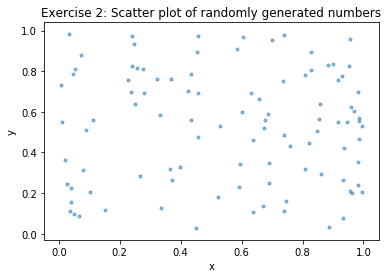

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# generating data from random numbers here
R = 100
x = np.random.rand(R)
y = np.random.rand(R)
colors = (0,0,0)
area = np.pi*3

# visualizing the scatter plot
plt.scatter(x, y, s=area, alpha=0.5)
plt.title('Exercise 2: Scatter plot of randomly generated numbers')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The breast cancer dataset has 30 features
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
The breast cancer dataset has 2 categories
['malignant' 'benign']


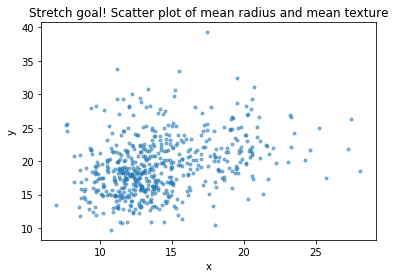

In [109]:
# visualizing breast cancer data
# will be using pandas to organize my data
import pandas as pd
from sklearn import datasets

# import data set
breast_cancer = datasets.load_breast_cancer()
breast_1_data = np.array(breast_cancer.data)
breast_0_labels = np.array(breast_cancer.target)
num_features = breast_1_data.data.shape[1]
unique_labels = np.unique(breast_0_labels)
num_classes = len(unique_labels)

# check data, establish context
print("The breast cancer dataset has " + str(num_features) + " features")
print(breast_cancer.feature_names)
print("The breast cancer dataset has " + str(num_classes) + " categories")
print(breast_cancer.target_names)

breast_data = pd.DataFrame(breast_1_data)
# breast_data.drop(breast_data.columns[[-1, 1:30]], axis=1, inplace=True)

breast_data.drop(breast_data.iloc[:, 2:30], inplace = True, axis = 1) 
breast_data.columns=['mean radius', 'mean texture']

x = breast_data['mean radius']
y = breast_data['mean texture']

# visualize
plt.scatter(x, y, s=area, alpha=0.5)
plt.title('Stretch goal! Scatter plot of mean radius and mean texture')
plt.xlabel('x')
plt.ylabel('y')
plt.show()